# DensityPlot Example Notebook

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from DensityPlot.plot import density2d
import matplotlib.pyplot as plt

## Let's generate some data

In [2]:
np.random.seed(0)
mean, cov = [0, 2], [(1, .8), (.8, 1)]
data = np.random.multivariate_normal(mean, cov, size=1000)
mean, cov = [5, 3], [(1, .4), (.4, 1)]
data2 = np.random.multivariate_normal(mean, cov, size=1000)
mean, cov = [10, 20], [(1, .5), (.5, 1)]
data3 = np.random.multivariate_normal(mean, cov, size=100)
combined = np.concatenate([data, data2])

## Inspect the raw data

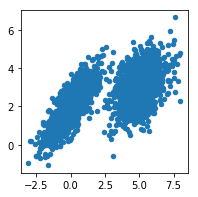

In [3]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(combined[:, 0], combined[:, 1], s=20);

## Making density plot is easy

### 2D-histogram and scatter 

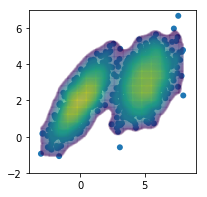

In [4]:
fig, ax = density2d(combined, alpha=0.03,
                    xlim=(-4, 9), ylim=(-2, 7), mode='scatter_mesh');

### 2D-histogram only

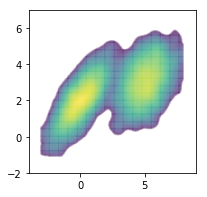

In [5]:
fig, ax = density2d(combined, alpha=0.03,
                    xlim=(-4, 9), ylim=(-2, 7), mode='mesh');

### Contour

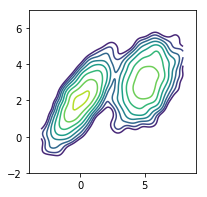

In [6]:
fig, ax = density2d(combined, alpha=0.03, s=10, mode='contour',
                    xlim=(-4, 9), ylim=(-2, 7), bins=300, logz=True)

### Binned scatter (typically analyzed in FACS)

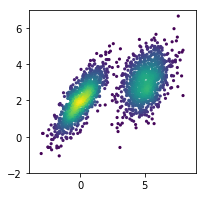

In [7]:
fig, ax = density2d(combined, alpha=0.03, s=10, mode='scatter',
                    xlim=(-4, 9), ylim=(-2, 7))

### Binned scatter with Bioexponential scale

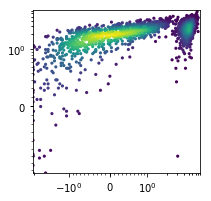

In [8]:
fig, ax = density2d(combined, alpha=0.03, s=10, mode='scatter',
                    xlim=(-4, 9), ylim=(-2, 8), xscale='biexp', yscale='biexp')

## Supplying two vectors instead of ndarray for input

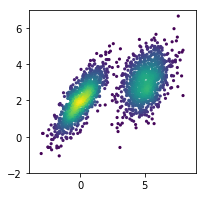

In [9]:
x = combined[:, 0]
y = combined[:, 1]
fig, ax = density2d(x=x, y=y, alpha=0.03, s=10, mode='scatter',
                    xlim=(-4, 9), ylim=(-2, 7))

## Adjusting the bin size

### Default: bins=300

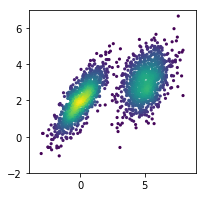

In [10]:
fig, ax = density2d(combined, bins=300, alpha=0.03, s=10, mode='scatter',
                    xlim=(-4, 9), ylim=(-2, 7))

### bins=50

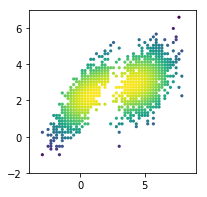

In [11]:
fig, ax = density2d(combined, bins=50, alpha=0.03, s=10, mode='scatter',
                    xlim=(-4, 9), ylim=(-2, 7))

### bins=1000

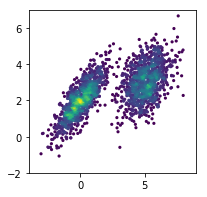

In [12]:
fig, ax = density2d(combined, bins=1000, alpha=0.03, s=10, mode='scatter',
                    xlim=(-4, 9), ylim=(-2, 7))

The larger ```bins``` value, the harder your computer will have to work to render.

## Adding labels and colorbar and some customization

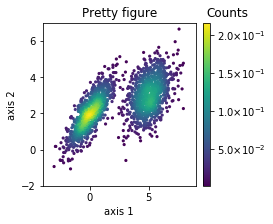

In [13]:
fig, ax = density2d(combined, alpha=0.03, s=10, title='Pretty figure', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7),
                    ylabel='axis 2', mode='scatter', colorbar=True)

## Normalize z-axis values as probability

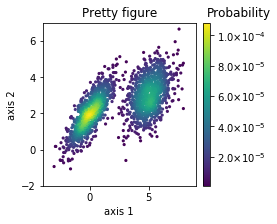

In [43]:
fig, ax = density2d(combined, alpha=0.03, s=10, title='Pretty figure', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7),
                    ylabel='axis 2', mode='scatter', colorbar=True, normed=True)

## Saving figure

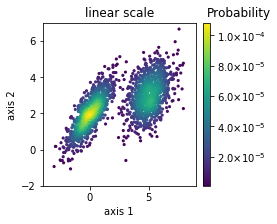

In [15]:
fig, ax = density2d(combined, alpha=0.03, s=10, title='linear scale', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7),
                    ylabel='axis 2', mode='scatter', colorbar=True, normed=True,
                    filename='./examples/Example_scatter.png')

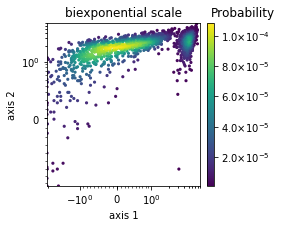

In [16]:
fig, ax = density2d(combined, alpha=0.03, s=10, title='biexponential scale', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7),
                    ylabel='axis 2', mode='scatter', colorbar=True, normed=True,
                    xscale='biexp', yscale='biexp',
                    filename='./examples/Example_scatter_biexp.png')

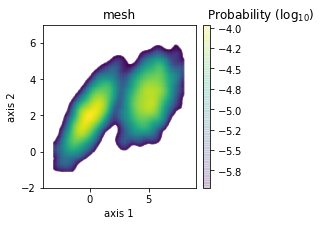

In [17]:
fig, ax = density2d(combined, alpha=0.1, title='mesh', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7),
                    ylabel='axis 2', mode='mesh', colorbar=True, normed=True,
                    filename='./examples/Example_mesh.png')

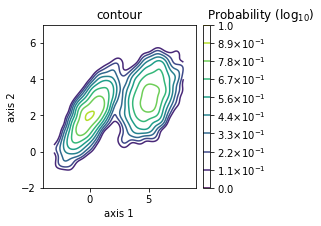

In [18]:
fig, ax = density2d(combined, alpha=0.1, title='contour', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7),
                    ylabel='axis 2', mode='contour', colorbar=True, normed=True,
                    filename='./examples/Example_contour.png')

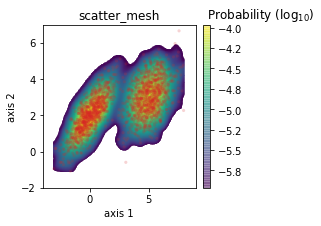

In [19]:
fig, ax = density2d(combined, alpha=0.3, title='scatter_mesh', xlabel='axis 1',
                    xlim=(-4, 9), ylim=(-2, 7), s=10, dot_alpha=0.2,
                    color='C3', mesh_order='bottom', ylabel='axis 2', mode='scatter_mesh',
                    colorbar=True, normed=True, filename='./examples/Example_scatter_mesh.png')

## Plotting on top of an existing figure

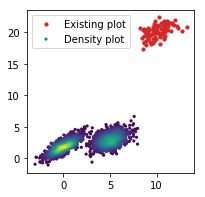

In [20]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(data3[:, 0], data3[:, 1], s=10, label='Existing plot', color='C3');
density2d(combined, ax=ax, alpha=0.03, s=10, mode='scatter', label='Density plot')
ax.legend();

## Plotting on top of an existing figure with biexponential scale

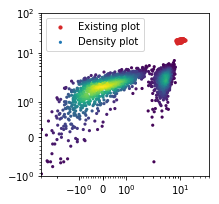

In [21]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(data3[:, 0], data3[:, 1], s=10, label='Existing plot', color='C3');
ax.set_xlim(-3, 50)
ax.set_ylim(-1, 100)
density2d(combined, ax=ax, alpha=0.03, s=10, mode='scatter', label='Density plot',
          xscale='biexp', yscale='biexp')
ax.legend();

## Single-cell mouse cell atlas

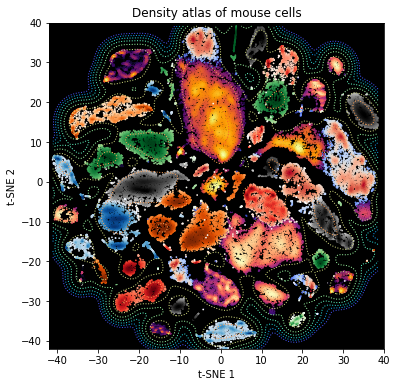

In [116]:
import pandas as pd
sc_in = './singleCell_data/'
droplet_d = pd.read_csv(sc_in+'tsne_droplet.csv.gz', index_col=0)
fig, ax = density2d(x=droplet_d['tSNE_1'], y=droplet_d['tSNE_2'], mode='contour', bins=400, figsize=(6, 6),
                    cmap='rainbow', logz=True, normed=True, linestyles=':', linewidths=1,
                    xlim=(-42, 40), ylim=(-42, 40),
                    xlabel='t-SNE 1', ylabel='t-SNE 2');
ax.set_facecolor('k')
cmap_rotations = ['Reds', 'Blues', 'Greens', 'Oranges', 'Greys', 'coolwarm', 'magma', 'inferno']
for u in np.unique(droplet_d['cluster']):
    cmap = cmap_rotations.pop()
    cmap_rotations.insert(0, cmap)
    sub = (droplet_d['cluster'].values == u)
    density2d(x=droplet_d.loc[sub, 'tSNE_1'], y=droplet_d.loc[sub, 'tSNE_2'], ax=ax, mode='scatter', bins=300, figsize=(6, 6),
                          min_threshold=0.2, cmap=cmap, logz=True, alpha=0.5, s=3,
                          mesh_order='bottom', title='Density atlas of mouse cells');
fig.savefig('./examples/mouse_cell_density_atlas.png', bbox_inches='tight', dpi=300)